In [1]:
import sys
sys.path.append("../../src")
import os
import numpy as np
import pickle
import scipy.io as sio
from example_reactiondiffusion import get_rd_data
from autoencoder import full_network
from training import create_feed_dictionary
from sindy_utils import sindy_simulate
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

/Users/mulligatawny/anaconda3/envs/pysindy/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mulligatawny/anaconda3/envs/pysindy/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mulligatawny/anaconda3/envs/pysindy/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/mulligatawny/an

In [2]:
data_path = os.getcwd() + '/'
save_name = 'rd_2022_05_30_13_11_37_607562'
params = pickle.load(open(data_path + save_name + '_params.pkl', 'rb'))
params['save_name'] = data_path + save_name

autoencoder_network = full_network(params)
learning_rate = tf.placeholder(tf.float32, name='learning_rate')
saver = tf.train.Saver(var_list=tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES))

tensorflow_run_tuple = ()
for key in autoencoder_network.keys():
    tensorflow_run_tuple += (autoencoder_network[key],)

In [3]:
_,_,test_data = get_rd_data()

## Single trajectory plots

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, data_path + save_name)
    test_dictionary = create_feed_dictionary(test_data, params)
    tf_results = sess.run(tensorflow_run_tuple, feed_dict=test_dictionary)

test_set_results = {}
for i,key in enumerate(autoencoder_network.keys()):
    test_set_results[key] = tf_results[i]

INFO:tensorflow:Restoring parameters from /Users/mulligatawny/Documents/coursework/cs230/project/SindyAutoencoders/examples/rd/rd_2022_05_30_13_11_37_607562


In [8]:
print(params['coefficient_mask']*test_set_results['sindy_coefficients'])

[[-0.0000000e+00 -0.0000000e+00 -0.0000000e+00]
 [ 1.1692642e+00  1.4910512e+00  2.9933414e-01]
 [ 1.8801558e+00  2.2959344e+00  1.3941373e+00]
 [ 1.0010359e+00  1.6967338e-01  9.7429745e-02]
 [ 8.0141366e-01  5.0198692e-01  3.6688004e-02]
 [ 8.8006836e-01  3.6204660e-01 -3.8306955e-02]
 [-7.7531561e-02  3.7529165e-01  1.1237118e-01]
 [ 8.3179188e-01  1.9491398e-01 -1.0276251e-03]
 [ 0.0000000e+00  2.2764029e-01  9.9645831e-02]
 [ 0.0000000e+00 -1.0406832e-01 -6.1879687e-02]
 [ 9.5639479e-01  8.8199562e-01  9.0998960e-01]
 [ 9.1376030e-01  8.3287483e-01  8.8012636e-01]
 [ 7.7423185e-01  8.2698667e-01  7.9660875e-01]
 [ 8.2772052e-01  8.0322206e-01  7.9220790e-01]
 [ 6.1875492e-01  7.3034173e-01  3.8115877e-01]
 [ 2.0929345e-01 -2.3448966e-02 -2.3816645e-02]
 [ 7.9654956e-01  9.0530765e-01  7.1956033e-01]
 [ 6.2934840e-01  7.4293017e-01  1.0158103e-01]
 [ 3.9917770e-01 -3.9635148e-02 -5.3037222e-02]
 [-1.5310779e-02  2.2211945e-02  2.6513265e-02]
 [ 9.9265945e-01  9.9091387e-01  9.90499

In [5]:
z_sim = sindy_simulate(test_set_results['z'][0], test_data['t'][:,0],
                       params['coefficient_mask']*test_set_results['sindy_coefficients'],
                       params['poly_order'], params['include_sine'])

(-0.45, 9.45, 0.06105849728217728, 0.06890634904453022)

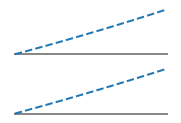

In [6]:
plt.figure(figsize=(3,2))
plt.subplot(2,1,1)
plt.plot(test_set_results['z'][:,0], 'k', color='#888888', linewidth=2)
plt.plot(z_sim[:,0], '--', linewidth=2)
plt.xticks([])
plt.yticks([])
plt.axis('off')

plt.subplot(2,1,2)
plt.plot(test_set_results['z'][:,1], color='#888888', linewidth=2)
plt.plot(z_sim[:,1], '--', linewidth=2)
plt.xticks([])
plt.yticks([])
plt.axis('off')

([], [])

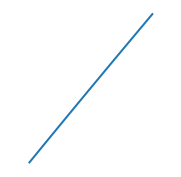

In [7]:
plt.figure(figsize=(3,3))
plt.plot(z_sim[:,0], z_sim[:,1], linewidth=2)
plt.axis('equal')
plt.axis('off')
plt.xticks([])
plt.yticks([])

In [ ]:
decoder_x_error = np.mean((test_data['x'] - test_set_results['x_decode'])**2)/np.mean(test_data['x']**2)
decoder_dx_error = np.mean((test_data['dx'] - test_set_results['dx_decode'])**2)/np.mean(test_data['dx']**2)
sindy_dz_error = np.mean((test_set_results['dz'] - test_set_results['dz_predict'])**2)/np.mean(test_set_results['dz']**2)

print('Decoder relative error: %f' % decoder_x_error)
print('Decoder relative SINDy error: %f' % decoder_dx_error)
print('SINDy reltive error, z: %f' % sindy_dz_error)